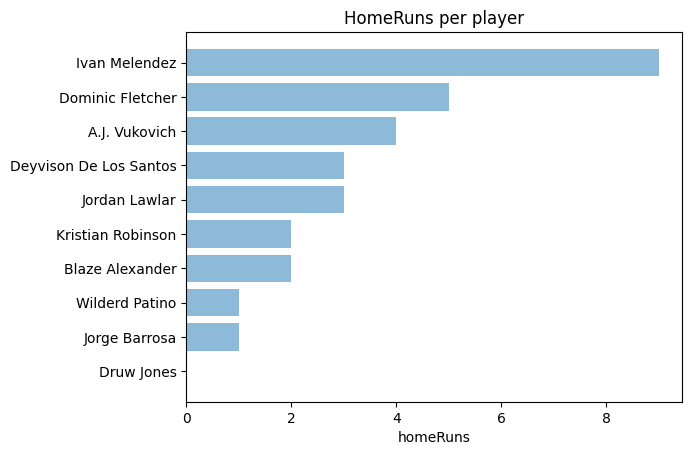

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

driver = webdriver.Chrome() 
driver.get("https://www.mlb.com/prospects/stats?teamId=109&dateRange=30day&minPA=1")

table = driver.find_element(By.ID, "battingProspects")
rows = table.find_elements(By.TAG_NAME, "tr")
rowsWithoutHeader = rows[1:]

table_data = []
names = []
homeRuns = []

for row in rowsWithoutHeader:
    data_cells = row.find_elements(By.TAG_NAME, "td")
    row_data = [cell.text for cell in data_cells]
    table_data.append(row_data)

driver.quit()

for row in table_data:
    if (len(row) > 1):
        names.append(row[1])
        homeRuns.append(row[11])

namesTuple = tuple(names)[:10]
homeRuns = homeRuns[:10]

# Convert 'homeRuns' from strings to integers and pair them with names using zip()
data = list(zip(namesTuple, [int(hr) for hr in homeRuns]))

# Sort the data based on home runs in descending order
data.sort(key=lambda x: x[1], reverse=False)

# Unpack the sorted data into names and homeRuns lists
namesTuple, performance = zip(*data)

# let's build the graph
y_pos = np.arange(len(namesTuple))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, namesTuple)
plt.xlabel('homeRuns')
plt.title('HomeRuns per player')
plt.show()


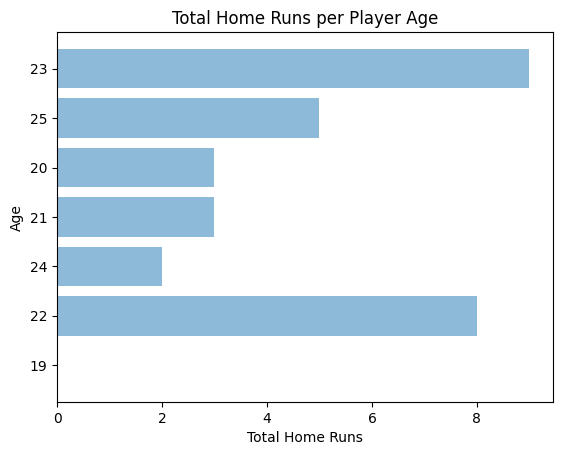

In [8]:
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
plt.rcdefaults()

driver = webdriver.Chrome()
driver.get("https://www.mlb.com/prospects/stats?teamId=109&dateRange=30day&minPA=1")

table = driver.find_element(By.ID, "battingProspects")
rows = table.find_elements(By.TAG_NAME, "tr")
rowsWithoutHeader = rows[1:]

table_data = []

for row in rowsWithoutHeader:
    data_cells = row.find_elements(By.TAG_NAME, "td")
    row_data = [cell.text for cell in data_cells]
    table_data.append(row_data)

driver.quit()

ages = []
homeRuns = []

for row in table_data:
    if (len(row) > 1):
        ages.append(int(row[3]))
        homeRuns.append(row[11])

agesTuple = tuple(ages)[:10]
homeRuns = homeRuns[:10]

data = list(zip(agesTuple, [int(hr) for hr in homeRuns]))
data.sort(key=lambda x: x[1], reverse=False)

# build a dictionary to group the homeruns per age
age_homeruns = {}

for age, hr in data:
    if age in age_homeruns:
        age_homeruns[age] += hr
    else:
        age_homeruns[age] = hr

ages = list(age_homeruns.keys())
total_homeruns = list(age_homeruns.values())

# let's build the graph
y_pos = np.arange(len(ages))
plt.barh(y_pos, total_homeruns, align='center', alpha=0.5)
plt.yticks(y_pos, ages)
plt.xlabel('Total Home Runs')
plt.ylabel('Age')
plt.title('Total Home Runs per Player Age')
plt.show()
